因为原始从官网http://yann.lecun.com/exdb/mnist/ 上下载的四个文件train-images.idx3-ubyte（训练集的特征），train-labels.idx1-ubyte（训练集的标签），t10k-images.idx3-ubyte（测试集的特征），t10k-labels.idx1-ubyte（测试集的标签）并非常用的文件格式，在下面这个网络上找到可以将原本的文件格式（我也没见过的格式）转换为常见的csv格式，并将训练集的特征和标签整合到mnist_train.csv ，并将测试集的特征和标签整合到mnist_test.csv https://pjreddie.com/projects/mnist-in-csv/

In [3]:
# https://pjreddie.com/projects/mnist-in-csv/
def convert(imgf, labelf, outf, n):
    f = open(imgf, "rb")
    o = open(outf, "w")
    l = open(labelf, "rb")
 
    f.read(16)
    l.read(8)
    images = []
 
    for i in range(n):
        image = [ord(l.read(1))]
        for j in range(28*28):
            image.append(ord(f.read(1)))
        images.append(image)
 
    for image in images:
        o.write(",".join(str(pix) for pix in image)+"\n")
    f.close()
    o.close()
    l.close()
 
convert("./train-images.idx3-ubyte", "./train-labels.idx1-ubyte",
        "mnist_train.csv", 50000)  # 原数据有60000，因为github上传100M文件有点麻烦，取50000个不影响
convert("./t10k-images.idx3-ubyte", "./t10k-labels.idx1-ubyte",
        "mnist_test.csv", 10000)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("mnist_train.csv")

In [4]:
data.shape

(49999, 785)

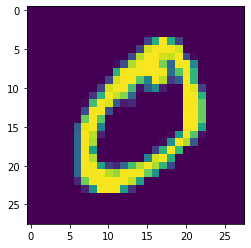

In [5]:
plt.imshow(data.iloc[0,1:].values.reshape(28,28))
plt.show()

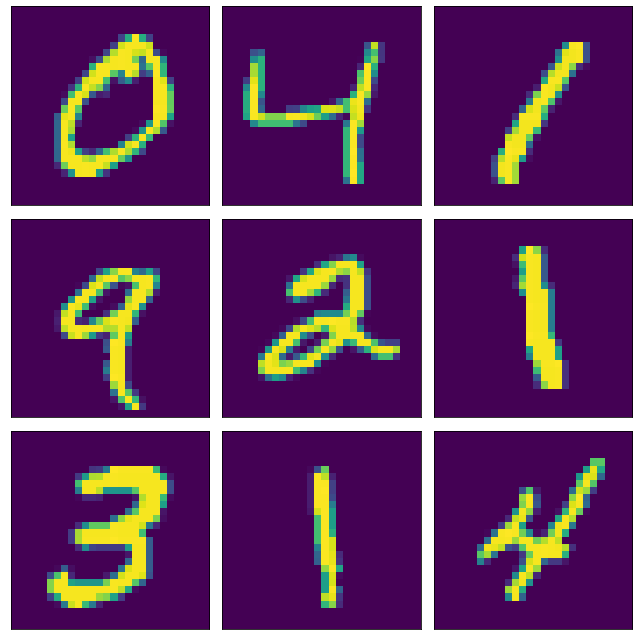

In [22]:
# 随便看一下前九个图像
fig ,axes = plt.subplots(3,3,figsize=(9,9),subplot_kw={"xticks":[],"yticks":[]})

for i in range(9):
    ax = axes.reshape(-1)[i]
    ax.imshow(data.iloc[i,1:].values.reshape(28,28))
plt.tight_layout()

plt.show()